In [324]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import zipfile
import kaggle

In [325]:
!kaggle datasets download -d arnabchaki/data-science-salaries-2023

data-science-salaries-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [326]:
# extract the file from the downloaded zip file
zipfile_name = 'data-science-salaries-2023.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [327]:
# read in the csv file as a pandas datafram
df = pd.read_csv("ds_salaries.csv")

Data Exploration: Perform exploratory data analysis to understand the structure of the dataset, identify any missing values or outliers, and gain insights into salary distributions.

In [328]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [329]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [330]:
df.drop('salary', axis=1, inplace=True)

In [331]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M


In [332]:
# replace employment type abbreviations
df['employment_type'] = df['employment_type'].replace({'FT': 'Full-Time', 'PT': 'Part-Time', 'FL': 'Freelance', 'CT': 'Contract'})

In [333]:
# replace employee residence abbreviations
mappings = {
    'VN': 'Vietnam',
    'UZ': 'Uzbekistan',
    'US': 'United States',
    'UA': 'Ukraine',
    'TR': 'Turkey',
    'TN': 'Tunisia',
    'TH': 'Thailand',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'RU': 'Russia',
    'RS': 'Serbia',
    'RO': 'Romania',
    'PT': 'Portugal',
    'PR': 'Puerto Rico',
    'PL': 'Poland',
    'PK': 'Pakistan',
    'PH': 'Philippines',
    'NZ': 'New Zealand',
    'NL': 'Netherlands',
    'NG': 'Nigeria',
    'MY': 'Malaysia',
    'MX': 'Mexico',
    'MT': 'Malta',
    'MK': 'North Macedonia',
    'MD': 'Moldova',
    'MA': 'Morocco',
    'LV': 'Latvia',
    'LU': 'Luxembourg',
    'LT': 'Lithuania',
    'KW': 'Kuwait',
    'KE': 'Kenya',
    'JP': 'Japan',
    'JE': 'Jersey',
    'IT': 'Italy',
    'IR': 'Iran',
    'IQ': 'Iraq',
    'IN': 'India',
    'IL': 'Israel',
    'IE': 'Ireland',
    'ID': 'Indonesia',
    'HU': 'Hungary',
    'HR': 'Croatia',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'GR': 'Greece',
    'GH': 'Ghana',
    'GB': 'United Kingdom',
    'FR': 'France',
    'FI': 'Faroe Islands',
    'ES': 'Spain',
    'EG': 'Egypt',
    'EE': 'Estonia',
    'DZ': 'Algeria',
    'DO': 'Dominican Republic',
    'DK': 'Denmark',
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'CY': 'Cyprus',
    'CR': 'Costa Rica',
    'CO': 'Colombia',
    'CN': 'China',
    'CL': 'Chile',
    'CH': 'Switzerland',
    'CF': 'Central African Republic',
    'CA': 'Canada',
    'BS': 'Bahamas',
    'BR': 'Brazil',
    'BO': 'Bolivia',
    'BG': 'Bulgaria',
    'BE': 'Belgium',
    'BA': 'Bosnia and Herzegovina',
    'AU': 'Australia',
    'AT': 'Austria',
    'AS': 'American Samoa',
    'AR': 'Argentina',
    'AM': 'Armenia',
    'AL': 'Albania',
    'AE': 'United Arab Emirates'
}

df.replace({'employee_residence': mappings, 'company_location': mappings}, inplace=True)


In [334]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [335]:
duplicate_rows = df.duplicated()

In [336]:
# salary distrubution insights
mean_salary = df['salary_in_usd'].mean()
median_salary = df['salary_in_usd'].median()
std_salary = df['salary_in_usd'].std()

print("Mean Salary: ", mean_salary)
print("Median Salary: ", median_salary)
print("Standard Deviation of Salary: ", std_salary)

Mean Salary:  137570.38988015978
Median Salary:  135000.0
Standard Deviation of Salary:  63055.625278224084


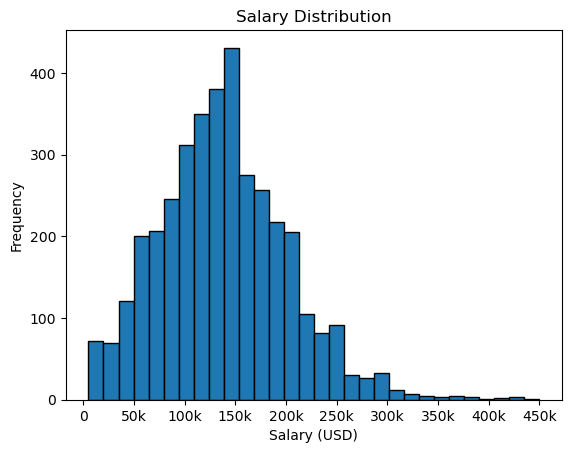

In [337]:
# salary distrubution insights
salary_ranges = pd.cut(df['salary_in_usd'], bins=[0, 50000, 100000, 150000, 200000, np.inf])
salary_counts = salary_ranges.value_counts().sort_index()

plt.hist(df['salary_in_usd'], bins=30, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Salary (USD)')
plt.title('Salary Distribution')

# modify x-axis labels
plt.xticks(np.arange(0, 450001, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k'])

plt.show()

Median salary is 135,000 with the mean salary being 137,570
1. How does job title affect salary?
2. How does experience level affect salary?
3. Which job roles are highest paying?

Salary Analysis: Analyze salary ranges for different data science job titles and experience levels. Identify high-paying roles and examine the relationship between salaries and other variables.

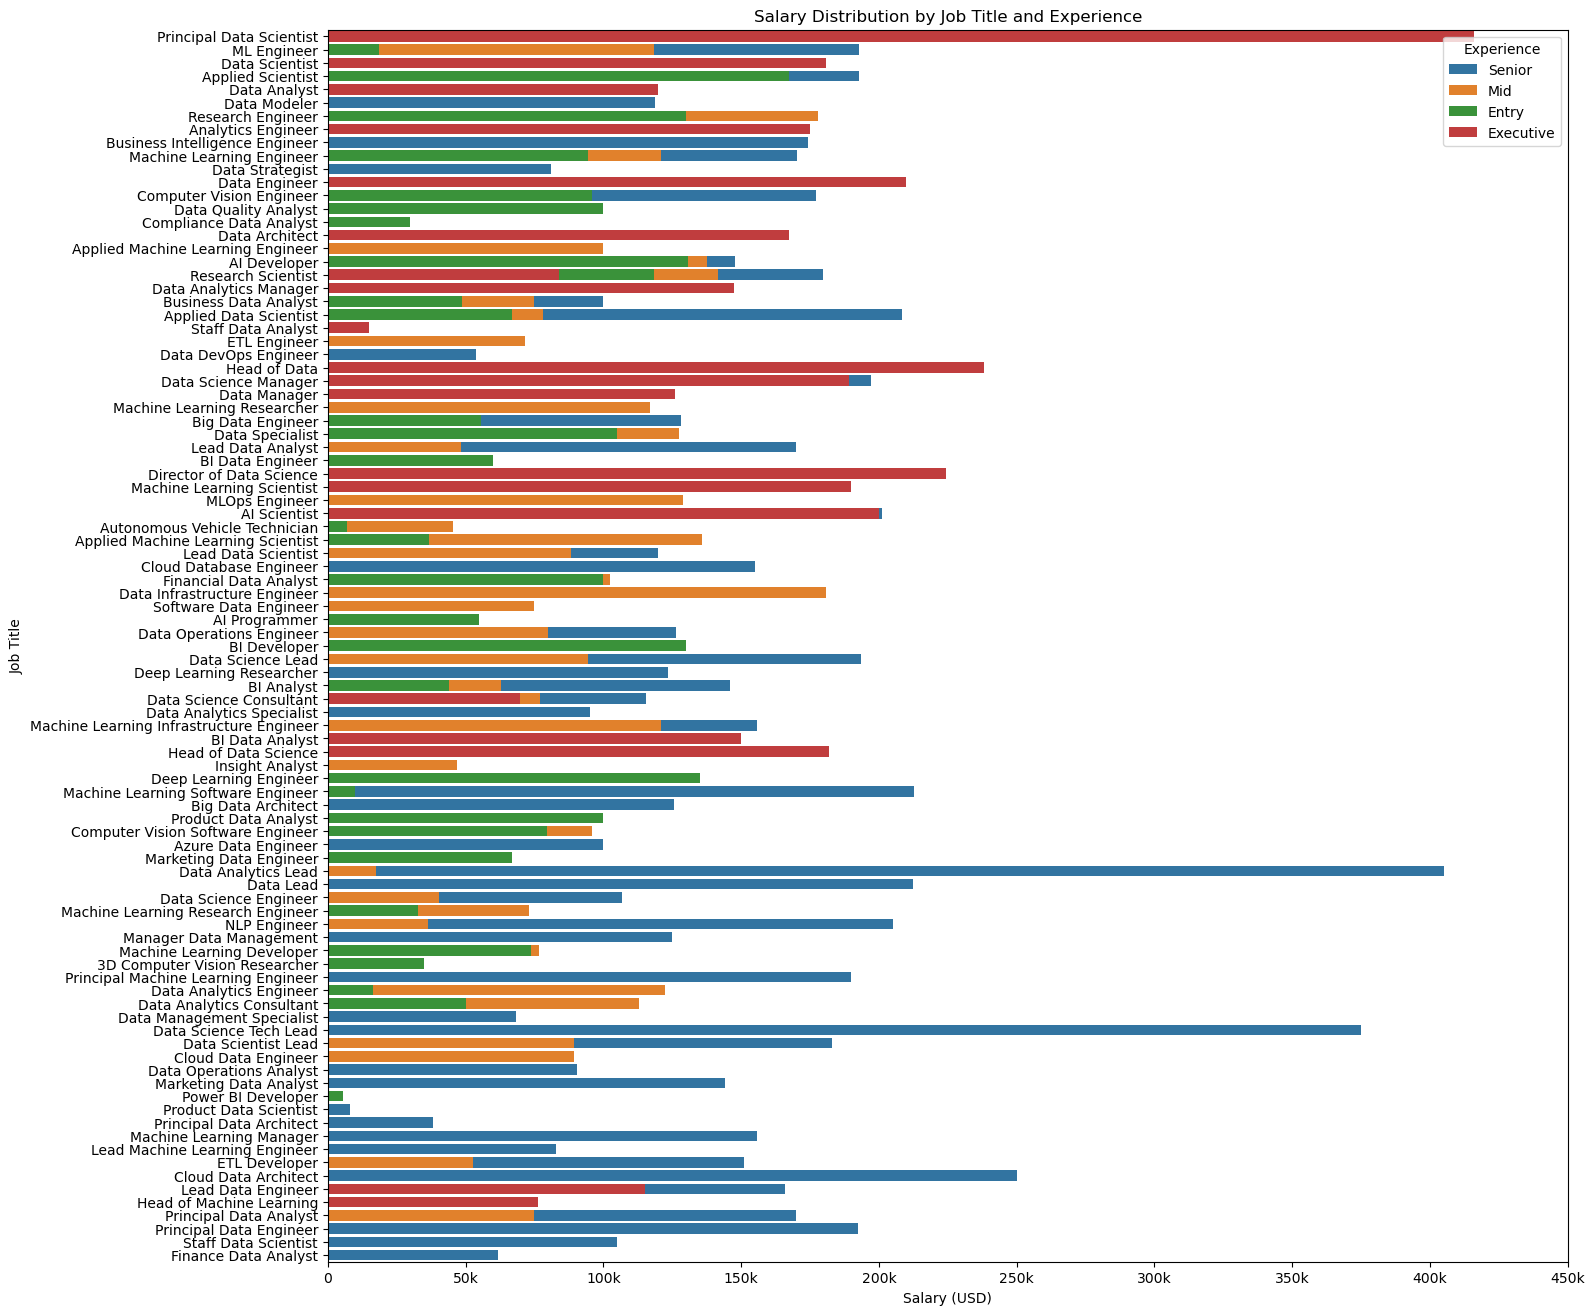

In [338]:
# bar plot. x = job title y = salary in usd hue = experience
plt.figure(figsize=(16, 16))
# title mapping
title_mapping = {
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive',
}
df['experience_level'] = df['experience_level'].replace(title_mapping)
sns.barplot(y='job_title', x='salary_in_usd', hue='experience_level', data=df, orient='h', dodge=False, errorbar=None)
plt.title('Salary Distribution by Job Title and Experience')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.legend(title='Experience')

# modify x axis
plt.xticks(np.arange(0, 450001, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k'])

plt.show()

In [339]:
df_sorted = df.sort_values('salary_in_usd', ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
top_roles = df_sorted.head(10)

print(top_roles[['job_title', 'salary_in_usd']])

                            job_title  salary_in_usd
0                  Research Scientist         450000
1                        Data Analyst         430967
2                        AI Scientist         423834
3  Applied Machine Learning Scientist         423000
4            Principal Data Scientist         416000
5                      Data Scientist         412000
6                 Data Analytics Lead         405000
7                        Data Analyst         385000
8              Applied Data Scientist         380000
9                      Data Architect         376080


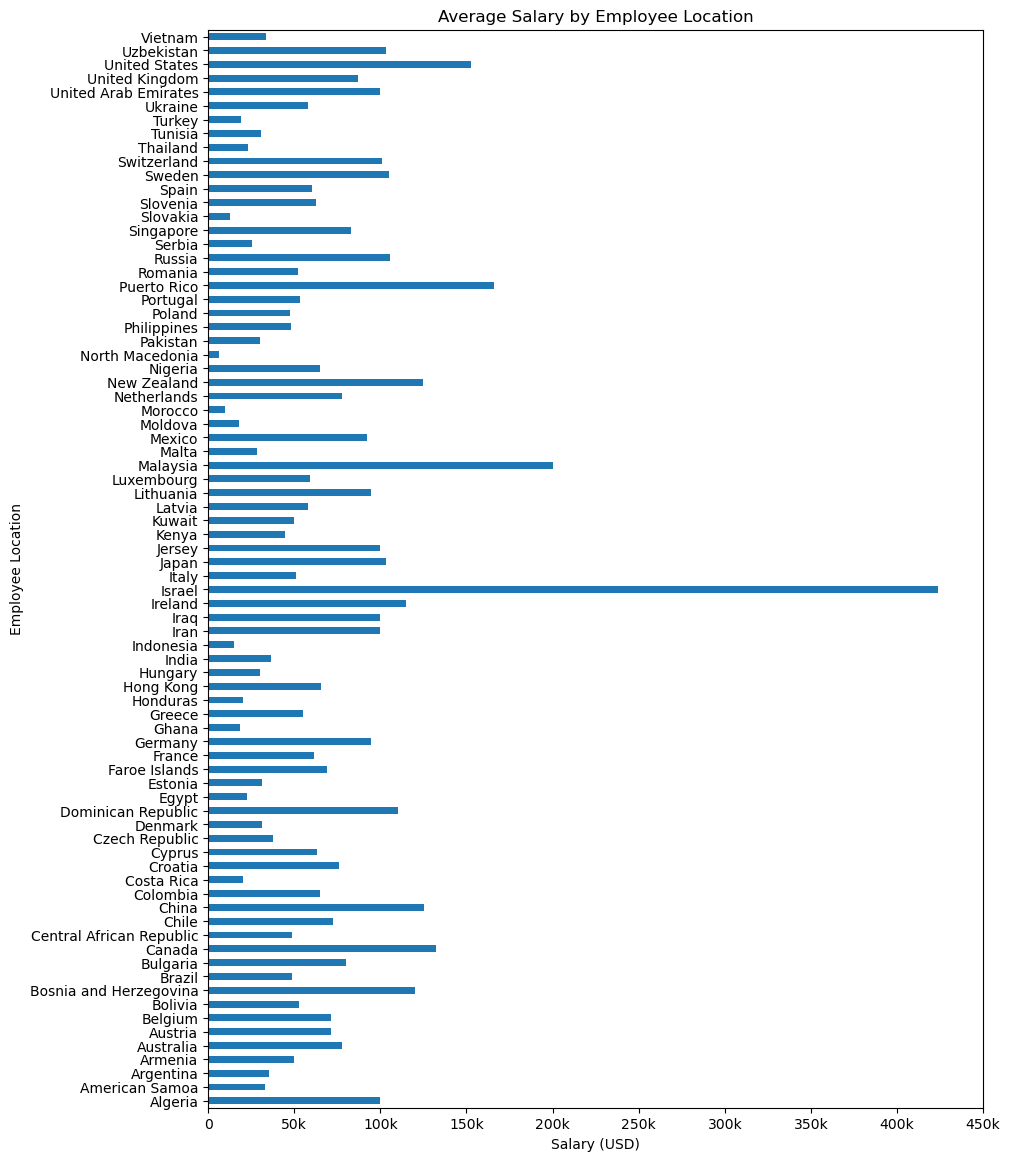

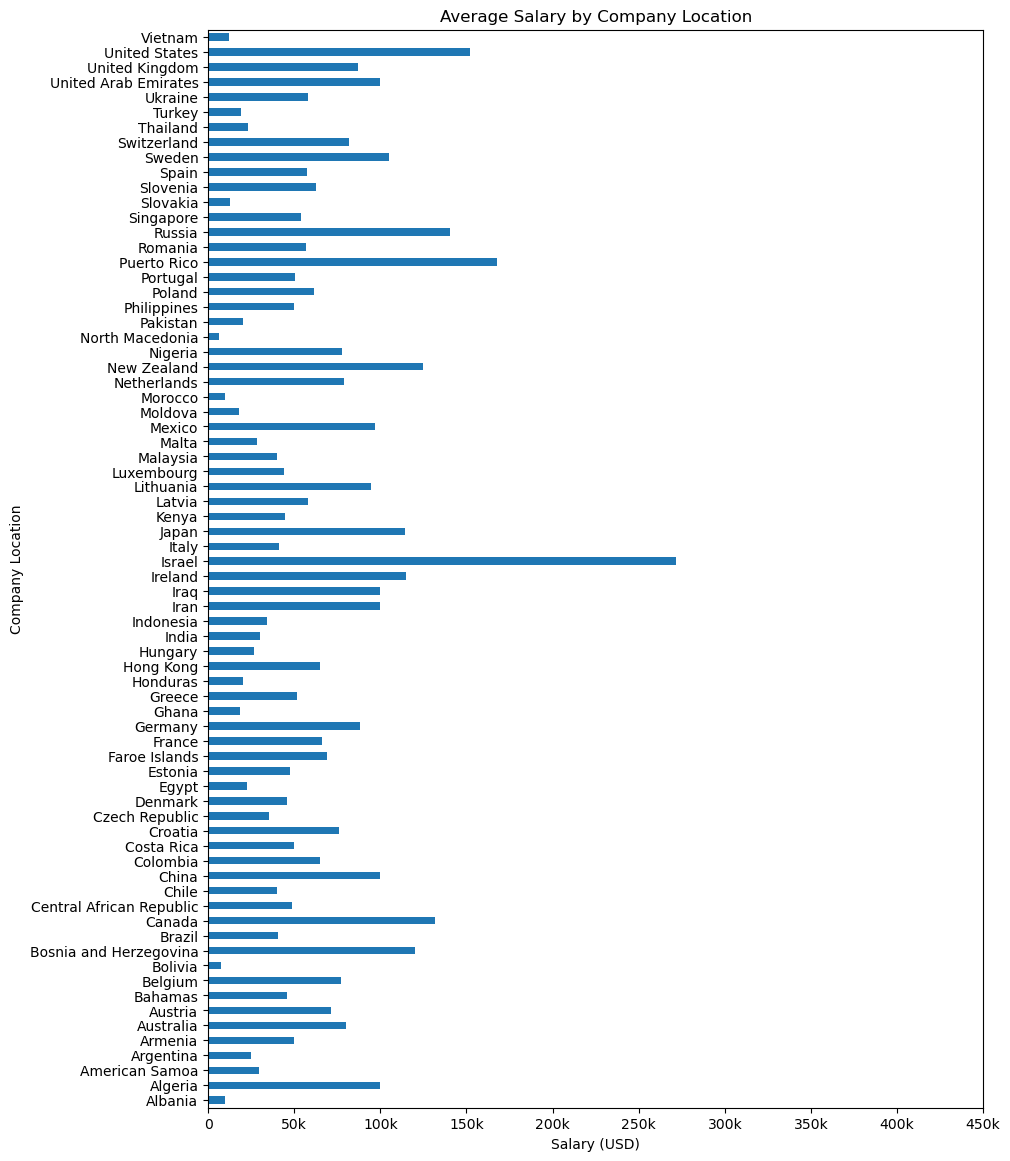

In [340]:
# group salaries by employee/company location
avg_salary_by_employee_location = df.groupby('employee_residence')['salary_in_usd'].mean()
avg_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean()

# visualise average salary by employee location
plt.figure(figsize=(10, 14))
avg_salary_by_employee_location.plot(kind='barh')
plt.xlabel('Salary (USD)')
plt.ylabel('Employee Location')
plt.title('Average Salary by Employee Location')
# modify x axis
plt.xticks(np.arange(0, 450001, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k'])
plt.show()

# visualise average salary by company location
plt.figure(figsize=(10, 14))
avg_salary_by_company_location.plot(kind='barh')
plt.xlabel('Salary (USD)')
plt.ylabel('Company Location')
plt.title('Average Salary by Company Location')

# modify x axis
plt.xticks(np.arange(0, 450001, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k'])

plt.show()

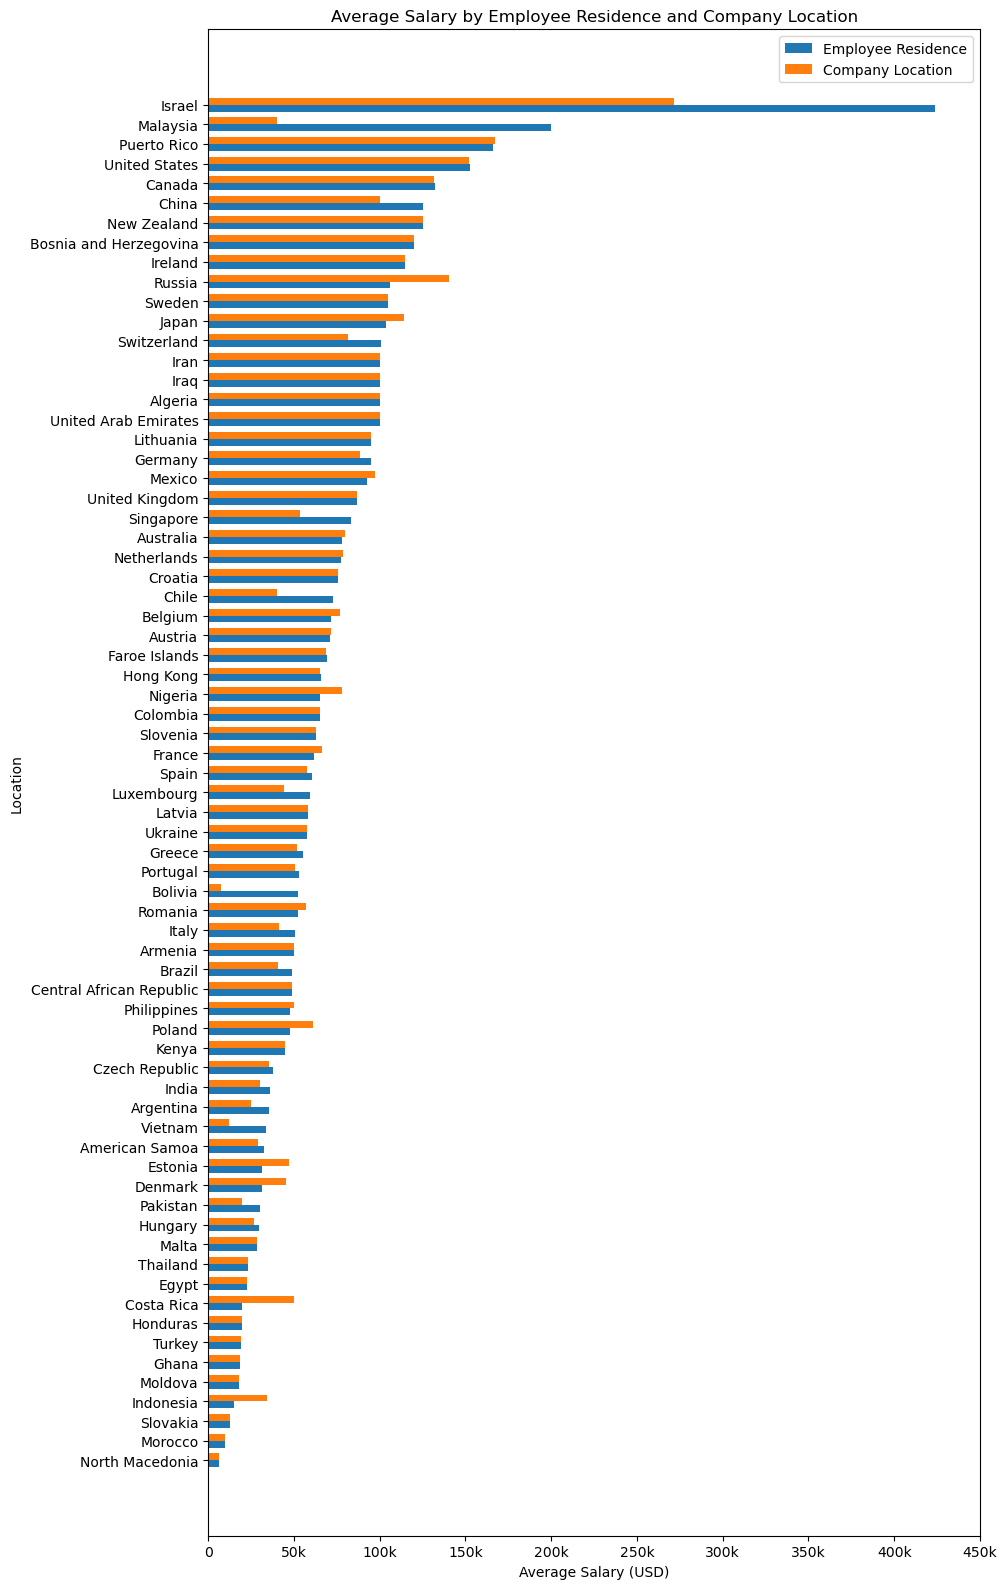

In [346]:
employee_locations = df['employee_residence'].unique()
company_locations = df['company_location'].unique()

common_locations = np.intersect1d(employee_locations, company_locations)

avg_salary_by_employee_location = df[df['employee_residence'].isin(common_locations)].groupby('employee_residence')['salary_in_usd'].mean()
avg_salary_by_company_location = df[df['company_location'].isin(common_locations)].groupby('company_location')['salary_in_usd'].mean()

common_locations_sorted = common_locations[np.argsort(avg_salary_by_employee_location)]

bar_width = 0.35
y = np.arange(len(common_locations_sorted))

plt.figure(figsize=(10, 16))
plt.barh(y - bar_width/2, avg_salary_by_employee_location[common_locations_sorted], bar_width, label='Employee Residence')
plt.barh(y + bar_width/2, avg_salary_by_company_location[common_locations_sorted], bar_width, label='Company Location')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Location')
plt.title('Average Salary by Employee Residence and Company Location')
plt.yticks(y, common_locations_sorted)
plt.legend()
plt.tight_layout()

# modify x axis
plt.xticks(np.arange(0, 450001, 50000), ['0', '50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k'])

plt.show()


Employment Analysis: Investigate the distribution of employment types among data science roles and analyze how it relates to salary variations.

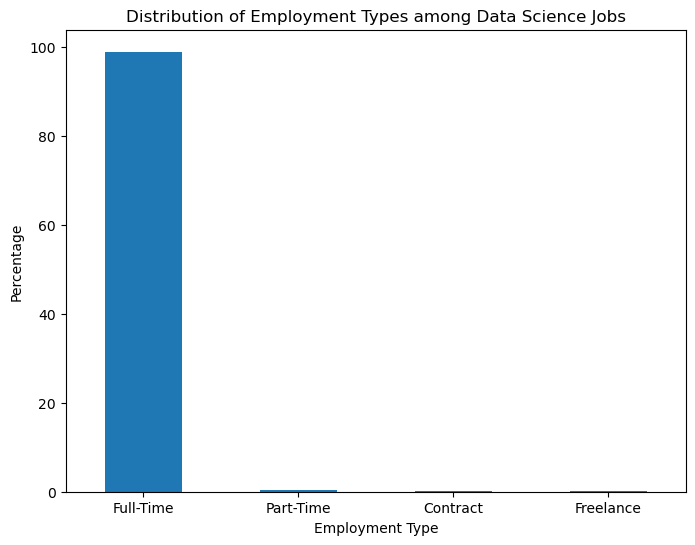

In [342]:
# calculate the employment distrubution among jobs
employment_distribution = df['employment_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
employment_distribution.plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Percentage')
plt.title('Distribution of Employment Types among Data Science Jobs')
plt.xticks(rotation = 0)
plt.show()

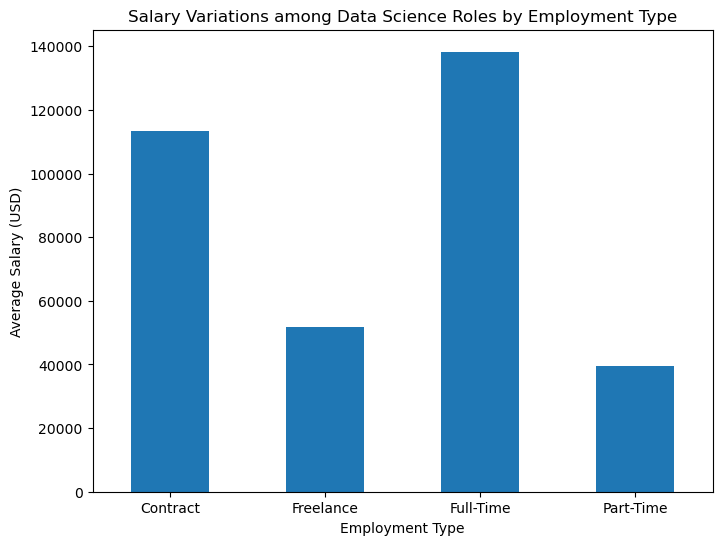

In [343]:
# average salary for employment type
salary_variation = df.groupby('employment_type')['salary_in_usd'].mean()
# visualise using bar
plt.figure(figsize=(8, 6))
salary_variation.plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Variations among Data Science Roles by Employment Type')
plt.xticks(rotation = 0)
plt.show()

Remote Work Analysis: Examine the proportion of remote work opportunities in data science jobs and explore how remote work impacts salary levels.

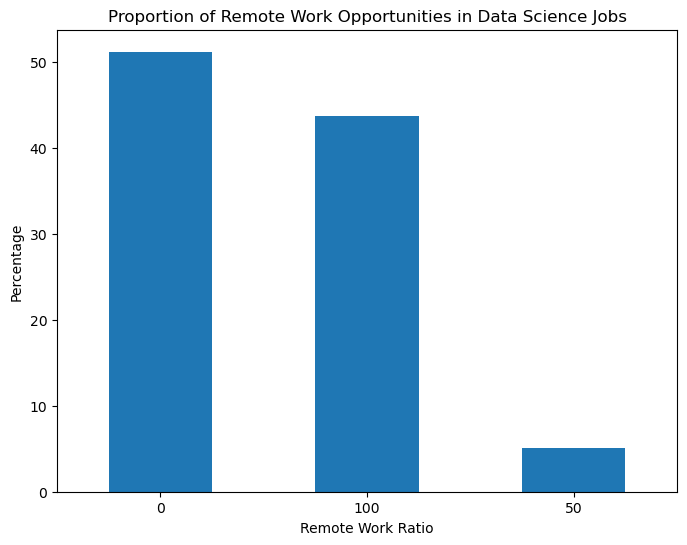

In [344]:
# calculate propotion of remote work
remote_work_proportion = df['remote_ratio'].value_counts(normalize=True) * 100
# visualise using bar 
plt.figure(figsize=(8, 6))
remote_work_proportion.plot(kind='bar')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Percentage')
plt.title('Proportion of Remote Work Opportunities in Data Science Jobs')
plt.xticks(rotation=0)
plt.show()


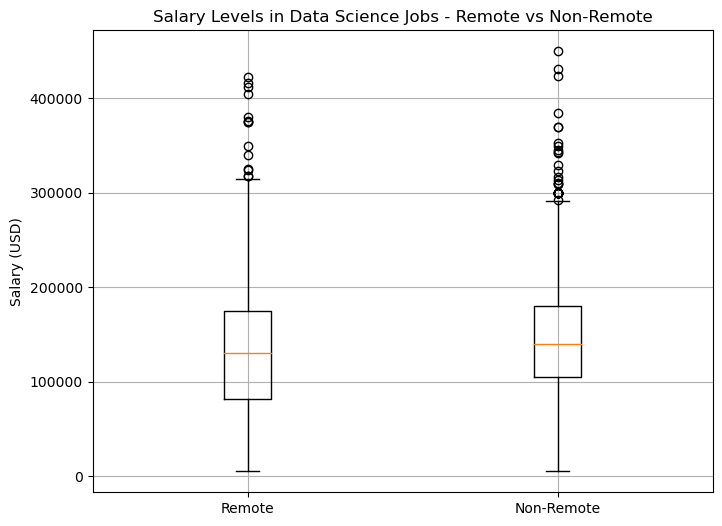

In [345]:
# seperate salary data for remote/non remote
remote_salary = df[df['remote_ratio'] > 0]['salary_in_usd']
non_remote_salary = df[df['remote_ratio'] == 0]['salary_in_usd']

# plot salary levels for remote/non remote
plt.figure(figsize=(8, 6))
plt.boxplot([remote_salary, non_remote_salary], labels=['Remote', 'Non-Remote'])
plt.ylabel('Salary (USD)')
plt.title('Salary Levels in Data Science Jobs - Remote vs Non-Remote')
plt.grid(True)
plt.show()